<center>

<img src="https://www.infnet.edu.br/infnet/wp-content/uploads/sites/18/2021/10/infnet-30-horizontal-padrao@300x-8-1024x265.png" width="60%"/>
</center>

---

# Algoritmos de Inteligência Artificial para clusterização [25E4_2]
## MIT em Inteligência Artificial, Machine Learning e Deep Learning em Data Science

---

__Conteúdo:__

- Pandas - Parte I:
  - Visão Geral
  - Terminologia
  - Estruturas de Dados

## Referências de apoio:

* [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) é uma biblioteca para análise de dados em Python, de código aberto, licenciada por BSD, utiliza o conceito de dataframes que funcionam como uma matriz de dados, formada por linhas e colunas.

* Documentação da biblioteca [matplotlib](https://matplotlib.org/).

* Ciência de Dados com Reprodutibilidade usando Jupyter, disponível: https://doi.org/10.5753/sbc.6757.3.1

* Uma introdução à análise de dados usando pandas, matplotlib e seaborn, disponívei em: https://sol.sbc.org.br/index.php/eri-mt/article/view/31223

* Introdução à Análise Exploratória de Dados com Python, disponível em https://www.researchgate.net/publication/336778766_Introducao_a_Analise_Exploratoria_de_Dados_com_Python

### Bibliotecas necessárias

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


---
## Pandas - Parte I
---

O Pandas é uma biblioteca licenciada com código aberto que oferece estruturas de dados de alto desempenho e de fácil utilização voltado a análise de dados para a linguagem de programação Python.
- Transforma dados de entrada em uma tabela de dados
- Componentes chave
  - Series (Séries)
  - DataFrame

### Séries (Series)
- Objeto unidimensional do tipo array contendo dados e rótulos (labels) (ou índices), criado sobre o numpy
- Se um índice não for informado explicitamente, Pandas cria um automaticamente (equivalente a `range(N)`, sendo N é o tamanho dos seus dados)
- O índice é usado para implementar buscas rápidas, alinhamento de dados e operações de junção (como join em SQL)
- Suporta índices hierárquicos, onde cada label é uma tupla

In [10]:
my_series = pd.Series([1, 3, 5, 7, 6, 8])
print(my_series)

0    1
1    3
2    5
3    7
4    6
5    8
dtype: int64


In [11]:
other_series = pd.Series([1, 3, 5, 7, 6, 8], index=['a', 'b', 'c', 'd', 'e', 'f'])
print(other_series)

a    1
b    3
c    5
d    7
e    6
f    8
dtype: int64


- Conteúdos podem ser acessados via um ou mais índices

In [12]:
my_series[0]

np.int64(1)

In [13]:
other_series['d']

np.int64(7)

- slicing funciona para índices numéricos e nominais

In [14]:
my_series

,0
0,1
1,3
2,5
3,7
4,6
5,8


In [15]:
my_series[2:4]

,0
2,5
3,7


In [16]:
my_series[1:3]

,0
1,3
2,5


In [17]:
other_series['a':'c']

,0
a,1
b,3
c,5


In [18]:
my_series[2:]

,0
2,5
3,7
4,6
5,8


In [19]:
my_series[:4]

,0
0,1
1,3
2,5
3,7


- máscaras boolenas também podem ser usadas

In [20]:
new_series = pd.Series([i for i in range(10, 60, 3)])
new_series

,0
0,10
1,13
2,16
3,19
4,22
5,25
6,28
7,31
8,34
9,37


In [21]:
mask = new_series > 30
mask

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,True
9,True


In [22]:
new_series[mask]

,0
7,31
8,34
9,37
10,40
11,43
12,46
13,49
14,52
15,55
16,58


In [23]:
new_series[~mask]

,0
0,10
1,13
2,16
3,19
4,22
5,25
6,28


In [24]:
new_series % 2 == 0

,0
0,True
1,False
2,True
3,False
4,True
5,False
6,True
7,False
8,True
9,False


In [25]:
other_mask = (new_series >= 20) & (new_series % 2 == 0)
new_series[other_mask]

,0
4,22
6,28
8,34
10,40
12,46
14,52
16,58


- reindex
  - modifica o valor do índice, adiciona valores faltantes ou preenche valores faltantes

In [26]:
series_1 = pd.Series(range(5, 25, 5))
series_1

,0
0,5
1,10
2,15
3,20


In [27]:
series_1.reindex([3,4,0,2,5,6])

,0
3,20.0
4,NaN
0,5.0
2,15.0
5,NaN
6,NaN


In [28]:
series_1.reindex([3,4,0,2,5,6], fill_value=100)

,0
3,20
4,100
0,5
2,15
5,100
6,100


- Operações aritméticas (realizada de acordo com o "match" dos indices)

In [29]:
series_1 = pd.Series([1, 2, 3, 4, 5])
series_2 = pd.Series([10, 20, 30, 40, 50])

series_1 + series_2

,0
0,11
1,22
2,33
3,44
4,55


- é possívle organizar os elementos de uma série pelo índice ou pelos valores

In [30]:
series_3 = pd.Series(np.random.randn(5), index=['e', 'c', 'a', 'b', 'd'])
series_3

,0
e,-0.537367
c,-0.477893
a,0.221021
b,-0.533010
d,-0.942783


In [31]:
series_3.sort_index()

,0
a,0.221021
b,-0.533010
c,-0.477893
d,-0.942783
e,-0.537367


In [32]:
series_3.sort_values()

,0
d,-0.942783
e,-0.537367
b,-0.533010
c,-0.477893
a,0.221021


In [33]:
series_3.sort_values(ascending=False)

,0
a,0.221021
c,-0.477893
b,-0.533010
e,-0.537367
d,-0.942783


- Há muitos métodos implementados para operar nos valores. Alguns exemplo, são:
  - unique()
  - value_counts()
  - isin()
  - ...(muito mais na parte II, próxima aula)

In [34]:
s = pd.Series(['c', 'a', 'a', 'd', 'e', 'e', 'e', 'd'])
s

,0
0,c
1,a
2,a
3,d
4,e
5,e
6,e
7,d


In [35]:
s.unique()

array(['c', 'a', 'd', 'e'], dtype=object)

In [36]:
s.value_counts()

,count
e,3
a,2
d,2
c,1


In [37]:
s.isin(['a', 'e'])

,0
0,False
1,True
2,True
3,False
4,True
5,True
6,True
7,False


In [38]:
s[s.isin(['a', 'e'])]

,0
1,a
2,a
4,e
5,e
6,e


In [39]:
help(s)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool | lib.NoDefault' = <no_default>) -> 'None'
 |
 |  One-dimensional ndarray with axis labels (including time series).
 |
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value


In [40]:
help(s.unique)

Help on method unique in module pandas.core.series:

unique() -> 'ArrayLike' method of pandas.core.series.Series instance
    Return unique values of Series object.

    Uniques are returned in order of appearance. Hash table-based unique,
    therefore does NOT sort.

    Returns
    -------
    ndarray or ExtensionArray
        The unique values returned as a NumPy array. See Notes.

    See Also
    --------
    Series.drop_duplicates : Return Series with duplicate values removed.
    unique : Top-level unique method for any 1-d array-like object.
    Index.unique : Return Index with unique values from an Index object.

    Notes
    -----
    Returns the unique values as a NumPy array. In case of an
    extension-array backed Series, a new
    :class:`~api.extensions.ExtensionArray` of that type with just
    the unique values is returned. This includes

        * Categorical
        * Period
        * Datetime with Timezone
        * Datetime without Timezone
        * Timedelta
 

In [41]:
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings

    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



In [42]:
dir(s)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [43]:
type(s)

pandas.core.series.Series

In [ ]:
# comentario de uma linha

# doc string - "comentario de mais de uma linha"
'''

  Docstring ...

'''



### DataFrames
Dataframe é uma estrutura de dados tabular bidimensional e mutável em tamanho, potencialmente heterogênea, com eixos rotulados (linhas e colunas).
- Possui índices de linhas e colunas
- Pode ser interpretado como um dicionário de Séries (cada série em uma linha) em que todas as Séries compartilham o mesmo conjunto de índices (os índices das colunas)

Dataframes podem ser criados de muitas maneiras diferentes:
- __2-D NumPy array:__ Uma matriz de dados, podendo passar os índices de linha e coluna
- __Dict of arrays, lists, or tuples:__ Cada sequência se torna uma coluna. As sequências devem ter o mesmo número de elementos
- __Dict of Series:__ Cada séries se torna uma coluna. Índices de cada séries são unidos para formar o índice das linhas
- __Dict of dicts:__ Cada dicionário se torna uma coluna. Chaves dos dicionários se unem para formar os índices das linhas
- __List of dicts or Series:__ Cada item se torna uma linha no DataFrame. A unidão das chaves (para dicionário) ou índices (para Séries) gera o índice das colunas
- __List of lists or tuples:__	Similar a uma matriz do numpy
- __DataFrame:__ O índice do DataFrame é mantido a não ser que um novo seja fornecido
- __NumPy masked array:__ Matriz de dados em que valores falso se tornam NaN


In [54]:
#criando um DataFrame

data = {
    'País' : ['Brasil', 'Argentina', 'Chile', 'Peru'],
    'Capital': ['Brasília', 'Buenos Aires', 'Santiago', 'Lima'],
    'População': [210000000, 45000000, 18000000, 32000000],
    'Área': [8515767, 2780400, 756950, 1285],
    'PIB': [1000000000000, 600000000000, 150000000000, 120000000000]
}

df = pd.DataFrame(data)
df

,País,Capital,População,Área,PIB
0,Brasil,Brasília,210000000,8515767,1000000000000
1,Argentina,Buenos Aires,45000000,2780400,600000000000
2,Chile,Santiago,18000000,756950,150000000000
3,Peru,Lima,32000000,1285,120000000000


In [55]:
type(df)

pandas.core.frame.DataFrame

**Atenção:** Duas funções são muito úteis para analisar rapidamente um novo DataFrame: df.head() e df.dtypes()

In [56]:
df.head()

,País,Capital,População,Área,PIB
0,Brasil,Brasília,210000000,8515767,1000000000000
1,Argentina,Buenos Aires,45000000,2780400,600000000000
2,Chile,Santiago,18000000,756950,150000000000
3,Peru,Lima,32000000,1285,120000000000


In [57]:
df.head(2)

,País,Capital,População,Área,PIB
0,Brasil,Brasília,210000000,8515767,1000000000000
1,Argentina,Buenos Aires,45000000,2780400,600000000000


In [58]:
df.dtypes

,0
País,object
Capital,object
População,int64
Área,int64
PIB,int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   País       4 non-null      object
 1   Capital    4 non-null      object
 2   População  4 non-null      int64 
 3   Área       4 non-null      int64 
 4   PIB        4 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 292.0+ bytes


In [60]:
df.tail()

,País,Capital,População,Área,PIB
0,Brasil,Brasília,210000000,8515767,1000000000000
1,Argentina,Buenos Aires,45000000,2780400,600000000000
2,Chile,Santiago,18000000,756950,150000000000
3,Peru,Lima,32000000,1285,120000000000


In [61]:
df.tail(2)

,País,Capital,População,Área,PIB
2,Chile,Santiago,18000000,756950,150000000000
3,Peru,Lima,32000000,1285,120000000000


In [62]:
df.shape

(4, 5)

#### Manipulando e Acessando Colunas

- Colunas podem ser acessadas:
  - usando seus rótulos dentro de []
  - usando rótulo como atributo
  - usando lista de rótulos dentro de [] (acessa várias colunas)

In [82]:
data = {
  'state' : ['FL', 'FL', 'GA', 'GA', 'GA'],
  'year'  : [2010, 2011, 2008, 2010, 2011],
  'pop'   : [18.8, 19.1, 9.7, 9.7, 9.8]
}

df = pd.DataFrame(data)
df

,state,year,pop
0,FL,2010,18.8
1,FL,2011,19.1
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8


In [64]:
df.shape

(5, 3)

In [68]:
df.columns.values

array(['state', 'year', 'pop'], dtype=object)

In [71]:
df.state

,state
0,FL
1,FL
2,GA
3,GA
4,GA


In [72]:
df['state']

,state
0,FL
1,FL
2,GA
3,GA
4,GA


In [73]:
df.pop

<bound method DataFrame.pop of   state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8>

In [74]:
df[['year', 'pop']]

,year,pop
0,2010,18.8
1,2011,19.1
2,2008,9.7
3,2010,9.7
4,2011,9.8


- Colunas podem ser criadas simplesmente criando um novo rótulo
- Colunas podem ser removidas usando o método `drop` ou `del`

In [83]:
print(f'DataFrame Original:\n {df}')
df['new_col'] = np.zeros(df.shape[0])
print(f'DataFrame com a nova coluna:\n {df}')

DataFrame Original:
   state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
DataFrame com a nova coluna:
   state  year   pop  new_col
0    FL  2010  18.8      0.0
1    FL  2011  19.1      0.0
2    GA  2008   9.7      0.0
3    GA  2010   9.7      0.0
4    GA  2011   9.8      0.0


In [89]:
df.drop('new_col', axis=1, inplace=True)
df

,state,year,pop
0,FL,2010,18.8
1,FL,2011,19.1
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8


In [90]:
df

,state,year,pop
0,FL,2010,18.8
1,FL,2011,19.1
2,GA,2008,9.7
3,GA,2010,9.7
4,GA,2011,9.8


#### Manipulando e Acessando Linhas

- linhas podem ser acessadas usando:
  - iloc: manipula o DataFrame como uma matriz com índices inteiros, assim como no Numpy
  - loc: seleciona linhas pelos rótulos (índices) ou por máscara booleana

In [92]:
print(df)
print(5*'-')
print(df.iloc[2]) #2	GA	2008	9.7
print(5*'-')
print(df.iloc[1:3])
print(5*'-')
print(df.iloc[1:4, 1:2])

  state  year   pop
0    FL  2010  18.8
1    FL  2011  19.1
2    GA  2008   9.7
3    GA  2010   9.7
4    GA  2011   9.8
-----
state      GA
year     2008
pop       9.7
Name: 2, dtype: object
-----
  state  year   pop
1    FL  2011  19.1
2    GA  2008   9.7
-----
   year
1  2011
2  2008
3  2010


In [93]:
data = {
    'FL' : {2010 : 18.1, 2011 : 19.1},
    'GA' : {2008 : 9.7 , 2010: 9.7, 2011 : 9.8}
}

df = pd.DataFrame(data)
df

,FL,GA
2010,18.1,9.7
2011,19.1,9.8
2008,NaN,9.7


In [94]:
print(df.loc[2008])
print(5*'-')
print(df.loc[2010:2011])
print(5*'-')
print(df.loc[2010:2011, 'FL'])

FL    NaN
GA    9.7
Name: 2008, dtype: float64
-----
        FL   GA
2010  18.1  9.7
2011  19.1  9.8
-----
2010    18.1
2011    19.1
Name: FL, dtype: float64


- Assim como nas Séries, também é possível ordernar por índice, mas ao ordernar por valor é necessário definir a coluna

In [95]:
print(df.loc[(df['GA'] == 9.7) & (df['FL'] == 18.1)])
print(5*'-')
print(df.loc[(df['GA'] == 9.8) | (df['FL'] == 18.1), 'FL'])

        FL   GA
2010  18.1  9.7
-----
2010    18.1
2011    19.1
Name: FL, dtype: float64


In [96]:
df.query('FL == 18.1')

,FL,GA
2010,18.1,9.7


In [99]:
minha_variavel=9.8
df.query('GA == @minha_variavel')

,FL,GA
2011,19.1,9.8


In [100]:
df.sort_index()

,FL,GA
2008,NaN,9.7
2010,18.1,9.7
2011,19.1,9.8


In [101]:
df.sort_values(by='GA', ascending=True)

,FL,GA
2010,18.1,9.7
2008,NaN,9.7
2011,19.1,9.8


**Atenção:** sort_values, gera uma cópia. Para modificar o DataFrame, deve-se passar o parâmetro `inplace = True`

In [102]:
df

,FL,GA
2010,18.1,9.7
2011,19.1,9.8
2008,NaN,9.7


In [105]:
df.sort_index(inplace=True)

In [106]:
df

,FL,GA
2008,NaN,9.7
2010,18.1,9.7
2011,19.1,9.8


## Carregando arquivos
Pandas permite diversas maneiras de carregas arquivos:
- Arquivos de texto
- Dados estruturados (JSON, XML, HTML, CSV)
- Excel (depende das biblitoecas xlrd e  openpyxl)
- Direto de base de dados
  - pandas.io.sql  (read_frame)

In [107]:
## abrindo um arquivo CSV direto da internet
file_path = 'https://raw.githubusercontent.com/gesielrios/AED-ERCAS-ENUCOMPI-2019/refs/heads/master/bolsa.csv'

bolsa_df = pd.read_csv(file_path)

In [108]:
bolsa_df.shape

(1261, 8)

In [109]:
bolsa_df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2014.06.13,54800,55155,54665,54940,679300,177772,5
1,2014.06.16,55135,55170,54515,54780,613450,164375,5
2,2014.06.17,54750,54940,54130,54215,411590,114115,5
3,2014.06.18,55100,56065,54820,56065,804810,203470,5
4,2014.06.20,55710,55775,55250,55505,677370,171775,5


In [111]:
bolsa_df.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
1256,2019.07.16,104750,104960,103780,104365,1842450,7241212,5
1257,2019.07.17,104450,104930,104150,104330,1668288,6689588,5
1258,2019.07.18,104165,105375,104065,105375,1338335,5791761,5
1259,2019.07.19,105500,105585,103665,103680,1422345,6259751,5
1260,2019.07.22,104100,104725,103945,104465,1477194,5901777,5


In [112]:
bolsa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     1261 non-null   object
 1   OPEN     1261 non-null   int64 
 2   HIGH     1261 non-null   int64 
 3   LOW      1261 non-null   int64 
 4   CLOSE    1261 non-null   int64 
 5   TICKVOL  1261 non-null   int64 
 6   VOL      1261 non-null   int64 
 7   SPREAD   1261 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 78.9+ KB


In [113]:
pnad_file_path = 'https://raw.githubusercontent.com/gesielrios/AED-ERCAS-ENUCOMPI-2019/refs/heads/master/pnad.csv'

pnad_df = pd.read_csv(pnad_file_path, sep=',')

In [114]:
pnad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uf                10000 non-null  int64  
 1   tipo_area         10000 non-null  int64  
 2   sexo              10000 non-null  object 
 3   idade             10000 non-null  int64  
 4   cor               10000 non-null  int64  
 5   pessoas_dom       10000 non-null  int64  
 6   freq_esc          9342 non-null   float64
 7   nivel_instrucao   9342 non-null   object 
 8   ocup_forca        7991 non-null   float64
 9   trab_procurou     3839 non-null   float64
 10  motivo_ntrab      3283 non-null   float64
 11  serv_pub          407 non-null    float64
 12  ocup_cond         4708 non-null   float64
 13  ocup_desc         4151 non-null   object 
 14  ocup_cod          4152 non-null   float64
 15  ocup_grupo        4152 non-null   float64
 16  ocup_pos          4152 non-null   float64

In [115]:
pnad_df['sexo'].value_counts()

,count
sexo,
feminino,5096
masculino,4904


In [117]:
pnad_df['nivel_instrucao'].value_counts(dropna=False)

,count
nivel_instrucao,
fundamental_inc,3539
medio,1966
sem_instrucao,1230
superior,850
fundamental,770
NaN,658
medio_inc,629
superior_inc,358


In [118]:
xls_df = pd.read_excel('dataset_1.xls')
xls_df.head()

,Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
0,Gabriela,15,8,0,Manhã,calmo
1,Dalila,20,6,1,Manhã,moderado
2,Gustavo,20,15,0,Manhã,moderado
3,Letícia,40,20,1,Tarde,agressivo
4,Luiz Ovídio,50,25,2,Tarde,agressivo


In [119]:
xls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Estudante                                        10 non-null     object
 1   Tempo para chegar à escola (minutos)             10 non-null     int64 
 2   Distância percorrida até a escola (quilômetros)  10 non-null     int64 
 3   Quantidade de semáforos                          10 non-null     int64 
 4   Período do dia                                   10 non-null     object
 5   Perfil ao volante                                10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [123]:
xls_df['Perfil ao volante'].unique()

array(['calmo', 'moderado', 'agressivo'], dtype=object)

In [125]:
bolsa_df.describe()

,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
count,1261.00000,1261.000000,1261.000000,1261.000000,1.261000e+03,1.261000e+03,1261.0
mean,66332.21253,66983.754956,65664.952419,66335.959556,5.627870e+05,1.664553e+06,5.0
std,16495.83902,16576.990031,16385.792553,16492.961922,5.245227e+05,1.839360e+06,0.0
min,37490.00000,37825.000000,37265.000000,37610.000000,4.766600e+04,5.402500e+04,5.0
25%,52820.00000,53460.000000,52230.000000,52900.000000,1.763040e+05,3.925880e+05,5.0
50%,62650.00000,63185.000000,62125.000000,62645.000000,2.885800e+05,8.008370e+05,5.0
75%,78440.00000,79000.000000,77920.000000,78450.000000,8.282950e+05,2.397654e+06,5.0
max,106950.00000,107295.000000,105820.000000,106205.000000,2.412460e+06,7.634894e+06,5.0


In [126]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [127]:
!ls $path -lh

total 20K
-rw-r--r-- 1 1000 1000  10K Oct  8 09:54 database.sqlite
-rw-r--r-- 1 1000 1000 5.0K Oct  8 09:54 Iris.csv


In [129]:
iris_df = pd.read_csv(path + '/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


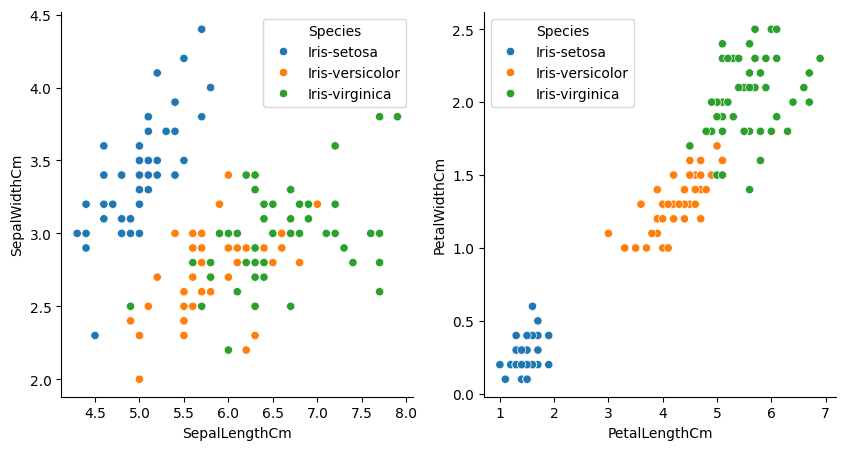

In [132]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', ax=ax[0])
sns.scatterplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', ax=ax[1])

sns.despine()
plt.show()

In [134]:
iris_df.columns[1:5]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

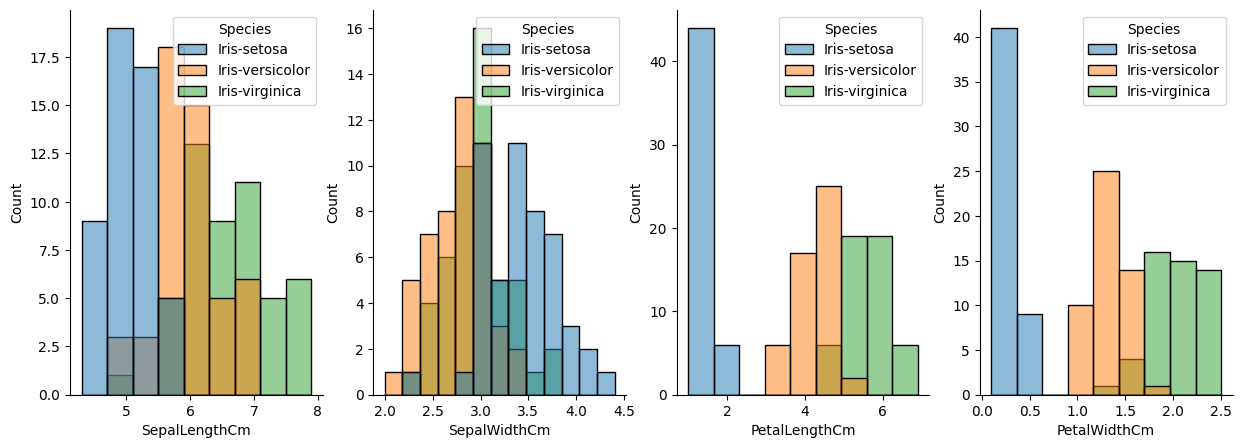

In [135]:
f, ax = plt.subplots(1,4, figsize=(15,5))

for i, column in enumerate(iris_df.columns[1:5]):
  sns.histplot(data=iris_df, x=column, hue='Species', ax=ax[i])

sns.despine()
plt.show()

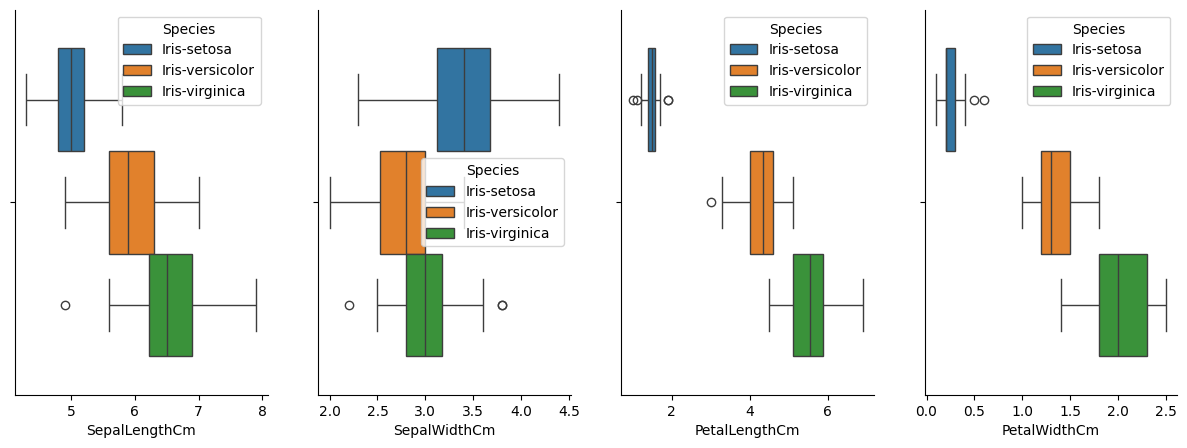

In [136]:
f, ax = plt.subplots(1,4, figsize=(15,5))

for i, column in enumerate(iris_df.columns[1:5]):
  sns.boxplot(data=iris_df, x=column, hue='Species', ax=ax[i])

sns.despine()
plt.show()

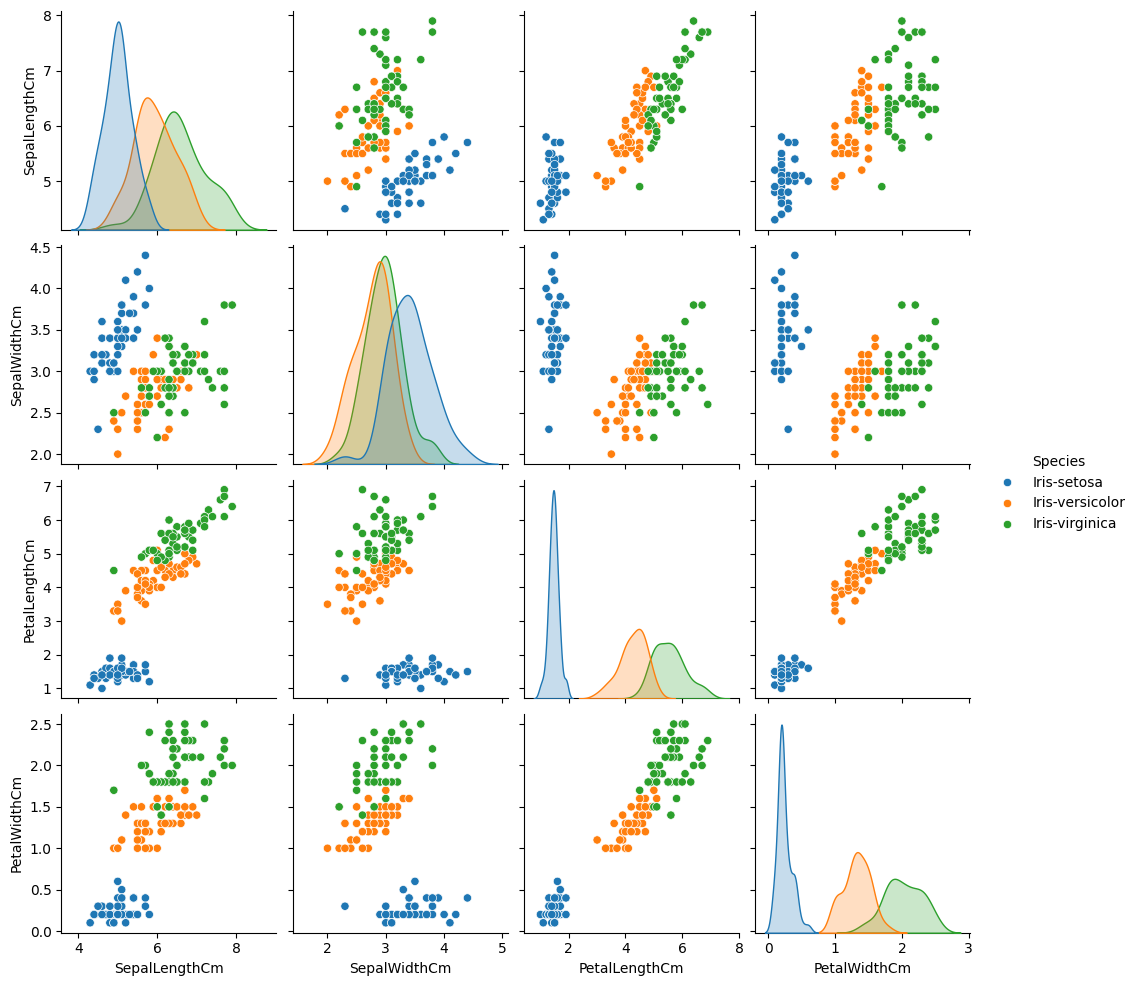

In [142]:
sns.pairplot(data=iris_df.iloc[:, 1:], hue='Species')

plt.show()

In [143]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!pip install jupyter-contrib-nbextensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing in

In [144]:
from ydata_profiling import ProfileReport

In [145]:
profile = ProfileReport(iris_df, title="Dataset Iris Profiling Report")

In [147]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

__Licensa__

![](https://drive.google.com/uc?export=view&id=1Uq7UxJPT9ytP0ABv8hYNWo9ciDZB7guX)

*This work is licensed under the Creative Commons Attribution-NonCommercial 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.*